In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import MaxPool2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [3]:
import zipfile


r = zipfile.ZipFile("10-food-class.zip","r")
r.extractall()
r.close()


In [ ]:
!ls

10-class-food.zip  10-food-class  __MACOSX  sample_data


In [5]:
import os

for path, dir , filename in os.walk("10-food-class"):
  print(f"{len(dir)} dir ---> {len(filename)} imgs at {path}")

2 dir ---> 0 imgs at 10-food-class
10 dir ---> 0 imgs at 10-food-class/test
0 dir ---> 250 imgs at 10-food-class/test/grilled_salmon
0 dir ---> 250 imgs at 10-food-class/test/chicken_curry
0 dir ---> 250 imgs at 10-food-class/test/pizza
0 dir ---> 250 imgs at 10-food-class/test/ramen
0 dir ---> 250 imgs at 10-food-class/test/sushi
0 dir ---> 250 imgs at 10-food-class/test/chicken_wings
0 dir ---> 250 imgs at 10-food-class/test/fried_rice
0 dir ---> 250 imgs at 10-food-class/test/hamburger
0 dir ---> 250 imgs at 10-food-class/test/ice_cream
0 dir ---> 250 imgs at 10-food-class/test/steak
10 dir ---> 0 imgs at 10-food-class/train
0 dir ---> 750 imgs at 10-food-class/train/grilled_salmon
0 dir ---> 750 imgs at 10-food-class/train/chicken_curry
0 dir ---> 750 imgs at 10-food-class/train/pizza
0 dir ---> 750 imgs at 10-food-class/train/ramen
0 dir ---> 750 imgs at 10-food-class/train/sushi
0 dir ---> 750 imgs at 10-food-class/train/chicken_wings
0 dir ---> 750 imgs at 10-food-class/train/fr

In [6]:
train_dir = "10-food-class/train"
test_dir = "10-food-class/test"

In [7]:
import numpy as np
class_names = np.array(sorted([j for j in os.listdir(train_dir)]))

In [8]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
import random as rd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mimg

In [10]:
def viewData(train_dir=train_dir):
  plt.figure(figsize=(20,10))
  for _ in range(5):
    plt.subplot(1, 5, _ + 1)
    class_names  = [j for j in os.listdir(train_dir)]
    choice = rd.randint(0, len(class_names))
    path_ = train_dir + "/" + class_names[choice]
    files =[ j for j in os.listdir(path_)]
    choice = rd.randint(0, len(files))
    path_ += "/" + files[choice]
    img = mimg.imread(path_)
    plt.title(path_.split("/")[-2], fontsize=10)
    plt.imshow(img)

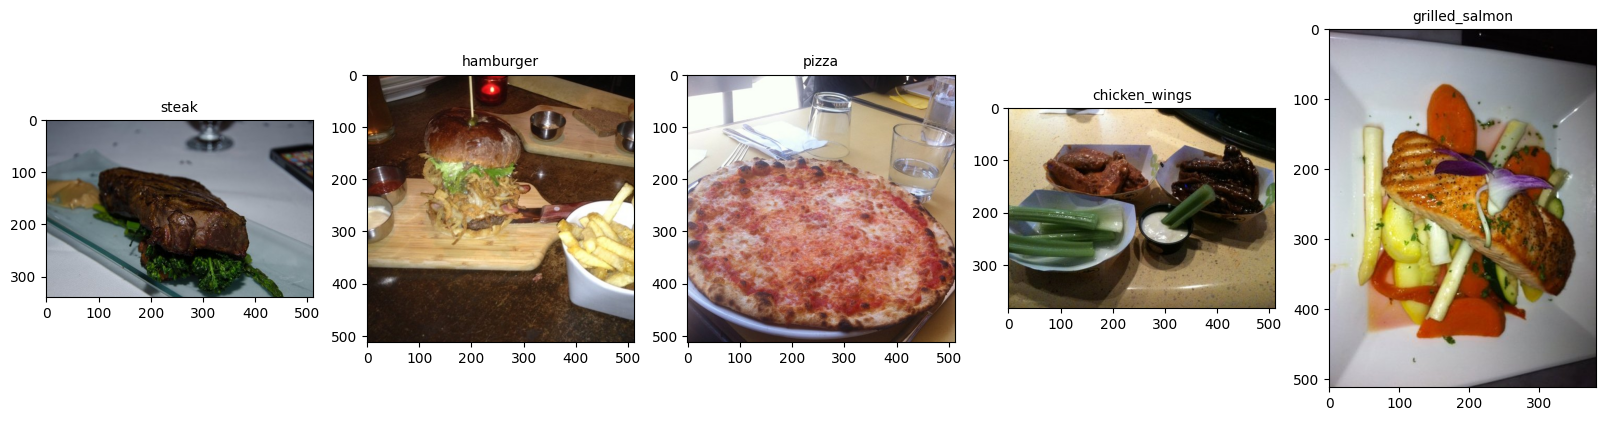

In [11]:
viewData(train_dir)

# **Normalizing and shuffling the data**



In [12]:
gen1 = ImageDataGenerator(rescale=1/255.)
gen2 = ImageDataGenerator(rescale=1/255.)

In [13]:
train_data = gen1.flow_from_directory(directory=train_dir,
                                              target_size=(224,224),
                                              color_mode='rgb',
                                              shuffle=True,
                                              seed=42,
                                              class_mode = 'categorical')

test_data = gen2.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             color_mode='rgb',
                                             shuffle=False,
                                             seed=42,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Model Creation

In [14]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=2, mode='min')

In [15]:
tf.random.set_seed(42)

model1 = Sequential([
    Conv2D(filters=10, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation="softmax")
])

model1.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

history1 = model1.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data=test_data,
           validation_steps = len(test_data),
          callbacks=[es])

Epoch 1/5
235/235 [==============================] - 40s 137ms/step - loss: 2.2726 - accuracy: 0.1361 - val_loss: 2.2015 - val_accuracy: 0.1800
Epoch 2/5
235/235 [==============================] - 35s 148ms/step - loss: 2.1770 - accuracy: 0.1920 - val_loss: 2.1411 - val_accuracy: 0.1892
Epoch 3/5
235/235 [==============================] - 31s 133ms/step - loss: 2.1231 - accuracy: 0.2049 - val_loss: 2.0755 - val_accuracy: 0.2224
Epoch 4/5
235/235 [==============================] - 30s 129ms/step - loss: 2.0775 - accuracy: 0.2369 - val_loss: 2.0729 - val_accuracy: 0.2284
Epoch 5/5
235/235 [==============================] - 32s 137ms/step - loss: 2.0506 - accuracy: 0.2517 - val_loss: 2.0671 - val_accuracy: 0.2420


In [16]:
import pandas as pd

<Axes: >

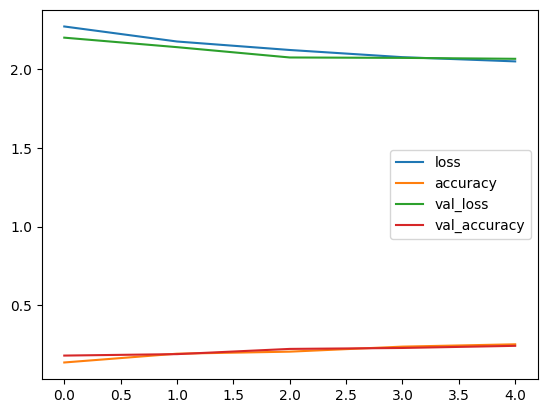

In [17]:
pd.DataFrame(history1.history).plot()


In [18]:
def plot_the_graph(hist):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Accuracy vs Val Accuracy")
  plt.plot(hist.history['accuracy'], label="accuracy")
  plt.plot(hist.history['val_accuracy'], label='val_accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.title('Loss vs Val Loss')
  plt.plot(hist.history['loss'], label="loss")
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.legend()


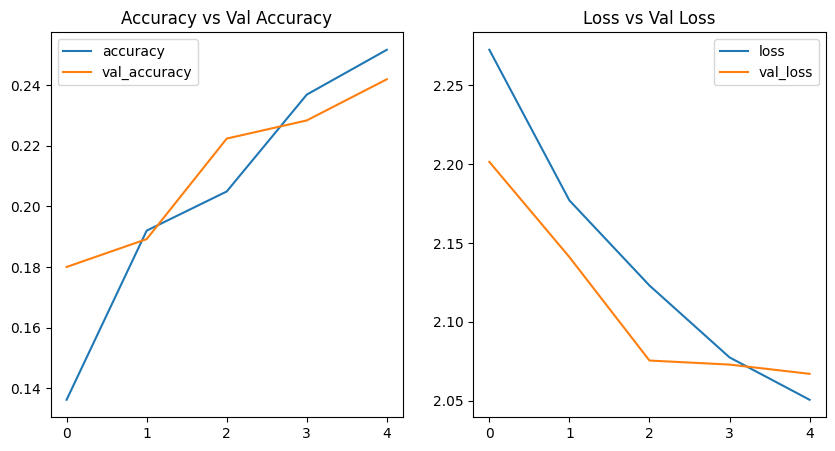

In [19]:
plot_the_graph(history1)

In [20]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [23]:
tf.random.set_seed(42)

model3 = Sequential([
    Conv2D(filters=10, kernel_size=4, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=4, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation='softmax')
])

model3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
history3 = model3.fit(train_data,
           epochs = 500,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data),
                      callbacks=[es]
           )

Epoch 1/500
235/235 [==============================] - 32s 129ms/step - loss: 2.1002 - accuracy: 0.2539 - val_loss: 1.8949 - val_accuracy: 0.3360
Epoch 2/500
235/235 [==============================] - 29s 123ms/step - loss: 1.7606 - accuracy: 0.4048 - val_loss: 1.8527 - val_accuracy: 0.3516
Epoch 3/500
235/235 [==============================] - 30s 127ms/step - loss: 1.3799 - accuracy: 0.5428 - val_loss: 1.9100 - val_accuracy: 0.3656
Epoch 4/500
235/235 [==============================] - 29s 123ms/step - loss: 0.8842 - accuracy: 0.7249 - val_loss: 2.3682 - val_accuracy: 0.3228
Epoch 4: early stopping


In [24]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 221, 221, 10)      490       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 107, 107, 10)      1610      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 28090)             0         
                                                                 
 dense_3 (Dense)             (None, 10)               

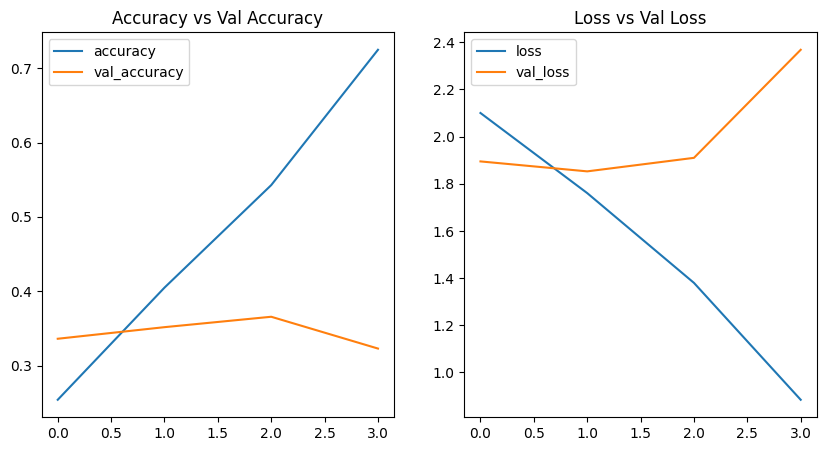

In [25]:
plot_the_graph(history3)

**Model is overfitting**

In [26]:
train_datagen = ImageDataGenerator(rescale=1/225.,
                                   shear_range=0.2,
                                   rotation_range = 20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_augdata = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(224,224),
                                                 seed=42,
                                                 batch_size=32,
                                                 class_mode = 'categorical')


Found 7500 images belonging to 10 classes.



## Model 2


In [28]:
tf.random.set_seed(42)

model2 = Sequential([
    Conv2D(filters=10, kernel_size=4,stride=3, activation='relu', input_shape=(224,224,3)),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=4,stride=3, activation='relu'),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation='softmax')
])

model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history2 = model2.fit(train_augdata,
           epochs = 50,
           steps_per_epoch = len(train_augdata),uh/08u
           validation_data = test_data,
           validation_steps = len(test_data),
           callbacks=[es]
           )

Epoch 1/50
235/235 [==============================] - 114s 480ms/step - loss: 2.2187 - accuracy: 0.1757 - val_loss: 2.1091 - val_accuracy: 0.2472
Epoch 2/50
235/235 [==============================] - 112s 479ms/step - loss: 2.0674 - accuracy: 0.2619 - val_loss: 2.0293 - val_accuracy: 0.2840
Epoch 3/50
235/235 [==============================] - 117s 498ms/step - loss: 1.9839 - accuracy: 0.3081 - val_loss: 1.8558 - val_accuracy: 0.3612
Epoch 4/50
235/235 [==============================] - 112s 478ms/step - loss: 1.9385 - accuracy: 0.3389 - val_loss: 1.8439 - val_accuracy: 0.3708
Epoch 5/50
235/235 [==============================] - 116s 493ms/step - loss: 1.9098 - accuracy: 0.3325 - val_loss: 1.7549 - val_accuracy: 0.4032
Epoch 6/50
235/235 [==============================] - 113s 479ms/step - loss: 1.8875 - accuracy: 0.3503 - val_loss: 1.7548 - val_accuracy: 0.3976
Epoch 7/50
235/235 [==============================] - 114s 487ms/step - loss: 1.8559 - accuracy: 0.3629 - val_loss: 1.7164 -

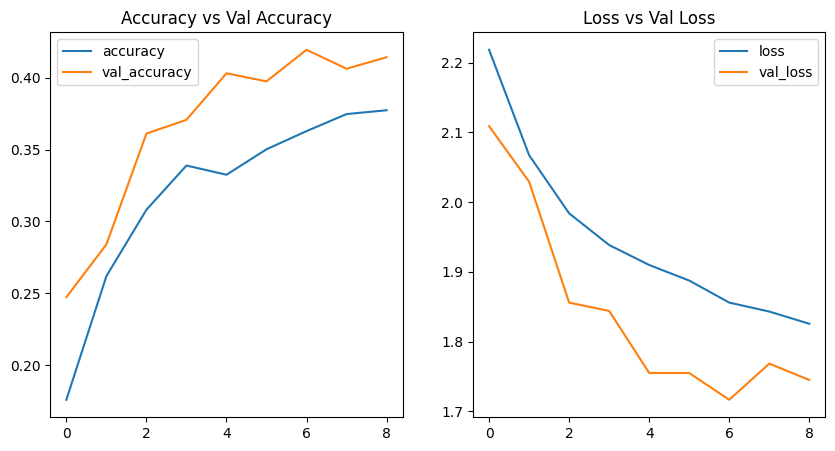

In [29]:
plot_the_graph(history2)

In [30]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

**This model is quite better than previous one**

  - Reduced Neural Network -> reducing overfitting
  - Perform better on high epochs


In [31]:
predict2 = model2.predict(test_data)

79/79 [==============================] - 8s 97ms/step


In [32]:

import random as rd

from PIL import Image
def prepareData(img_path):
  img = Image.open(img_path).convert("RGB")
  img = tf.image.resize(img, size=(224,224))
  img = img/255.
  plt.imshow(img)
  return img

def predict_plot(model, path="10-food-class/test/"):

  dir_choice  =  os.listdir(path)
  food_class = dir_choice[rd.randint(0,len(dir_choice))]
  path += food_class + "/"
  img_choice = os.listdir(path)
  path += img_choice[rd.randint(0,len(img_choice)-1)]
  samp_ = prepareData(path)
  samp = tf.expand_dims(samp_, axis=0)
  pred_ = int(tf.round(model.predict(samp).argmax()))
  pred_class = dir_choice[pred_]
  if pred_class == food_class:
    plt.title(f"{dir_choice[pred_]}", c='g')
  else:
    plt.title(f"{pred_class}", c='r')
  plt.imshow(samp_)


1/1 [==============================] - 0s 19ms/step


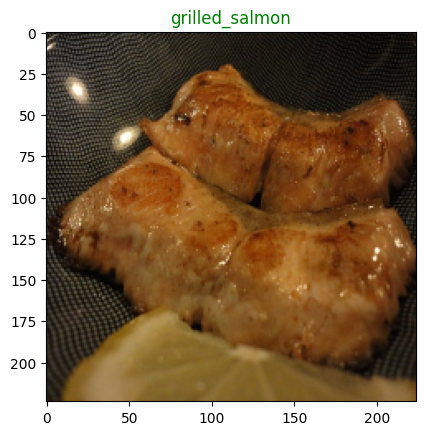

In [37]:
predict_plot(model2,path="10-food-class/test/")

# **Transfer Learning**

In [38]:
import datetime

In [40]:
train_data

In [61]:
train_data = ImageDataGenerator(rescale=1/255.,
                                shear_range=0.2,
                                height_shift_range=0.2,
                                width_shift_range=0.2,
                                horizontal_flip=True,
                                zoom_range=0.2,
                                rotation_range=20)

test_data = ImageDataGenerator(rescale=1/255.)
train_data_resc = ImageDataGenerator(rescale=1/255.)

train_data_aug = train_data.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                seed=42)
train_data_non_aug = train_data_resc.flow_from_directory(train_dir,
                                                         target_size=(224,244),
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         seed=42)

test_data_aug = test_data.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              seed=42)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [42]:
import datetime
def create_callbacks(dir_name, exp_name):
    log_dir = dir_name + "/" + exp_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tens_callbacks = tf.keras.callbacks.TensorBoard(
        log_dir = "./logs"
    )
    print(f"Dumping the logs in {log_dir} ")
    return tens_callbacks

In [43]:
import tensorflow_hub as hub

In [44]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

In [45]:
efficientnet_url = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2'

## Model 4

###  Using Transfer Learning

In [46]:
model4 = Sequential([
    hub.KerasLayer(resnet_url,
    trainable=False,
    name ="feature_extractor_layer",
                   input_shape=(224,224,3)),
    Dense(len(np.array(class_names)), activation='softmax')
])



In [47]:
model4.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [49]:
history4 = model4.fit(train_data_aug,
           epochs=20,
           steps_per_epoch=len(train_data_aug),
           validation_data= test_data_aug,
           validation_steps = len(test_data_aug),
           callbacks=[es])

Epoch 1/20
235/235 [==============================] - 124s 526ms/step - loss: 1.0493 - accuracy: 0.6636 - val_loss: 0.5404 - val_accuracy: 0.8252
Epoch 2/20
235/235 [==============================] - 120s 512ms/step - loss: 0.7028 - accuracy: 0.7713 - val_loss: 0.4906 - val_accuracy: 0.8392
Epoch 3/20
235/235 [==============================] - 119s 508ms/step - loss: 0.6392 - accuracy: 0.7891 - val_loss: 0.4691 - val_accuracy: 0.8424
Epoch 4/20
235/235 [==============================] - 121s 514ms/step - loss: 0.5834 - accuracy: 0.8057 - val_loss: 0.4420 - val_accuracy: 0.8564
Epoch 5/20
235/235 [==============================] - 121s 514ms/step - loss: 0.5513 - accuracy: 0.8144 - val_loss: 0.4488 - val_accuracy: 0.8540
Epoch 6/20
235/235 [==============================] - 120s 511ms/step - loss: 0.5354 - accuracy: 0.8239 - val_loss: 0.4377 - val_accuracy: 0.8552
Epoch 7/20
235/235 [==============================] - 120s 511ms/step - loss: 0.5076 - accuracy: 0.8345 - val_loss: 0.4345 -

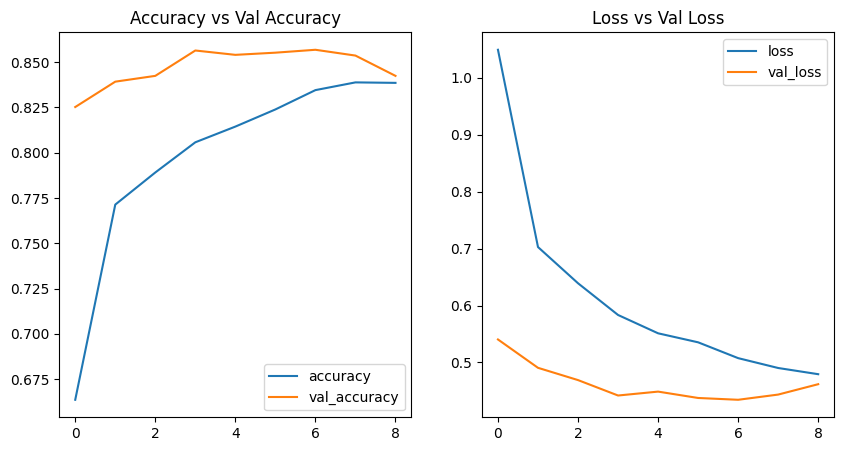

In [50]:
plot_the_graph(history4)

In [55]:

import random as rd

from PIL import Image
def prepareData(img_path):
  img = Image.open(img_path).convert("RGB")
  img = tf.image.resize(img, size=(224,224))
  img = img/255.
  return img

def predict_plot(model, path="10-food-class/test/"):
  plt.figure(figsize=(20,6))
  for i in range(6):
      plt.subplot(1,6,i+1)
      path="10-food-class/test/"
      dir_choice  =  os.listdir(path)
      food_class = dir_choice[rd.randint(0,len(dir_choice)-1)]
      path += food_class + "/"
      img_choice = os.listdir(path)
      path += img_choice[rd.randint(0,len(img_choice)-1)]
      samp_ = prepareData(path)
      samp = tf.expand_dims(samp_, axis=0)
      pred_ = int((model.predict(samp).argmax()))
      pred_class = class_names[pred_]
      if pred_class == food_class:
        plt.title(f"{class_names[pred_]}", c='g')
      else:
        plt.title(f"{pred_class}", c='r')
      plt.imshow(samp_)


1/1 [==============================] - 0s 21ms/step


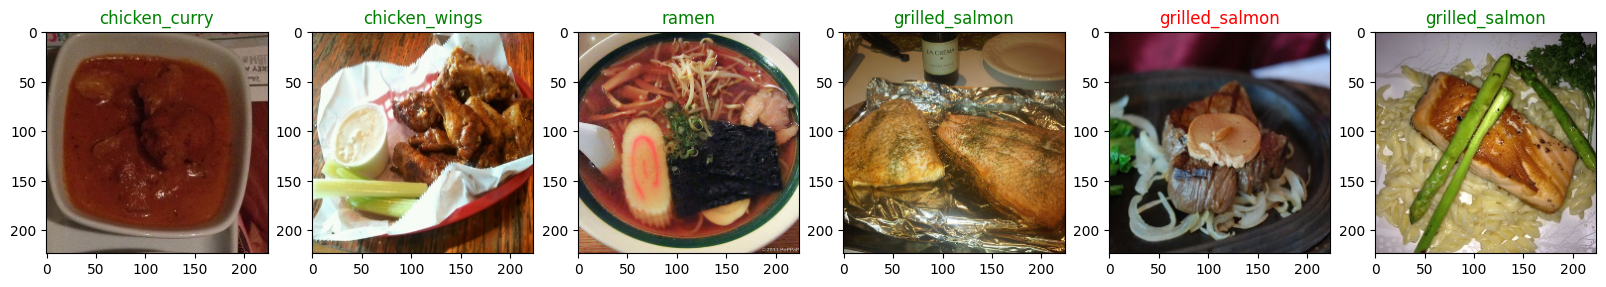

In [70]:
predict_plot(model4)

In [64]:

tf.random.set_seed(42)

model6 = Sequential([
    hub.KerasLayer(efficientnet_url,
                   trainable=False,
                   name="feature_extractor",
                   input_shape=(224,224,3)),
    Dense(len(class_names), activation='softmax')
])

model6.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history6 = model6.fit(train_data_non_aug,
                      epochs=20,
                      steps_per_epoch = len(train_data_non_aug),
                      validation_data= test_data_aug,
                      validation_steps = len(test_data_aug),
                      callbacks=[es])

Epoch 1/20
235/235 [==============================] - 48s 163ms/step - loss: 1.0615 - accuracy: 0.6859 - val_loss: 0.6334 - val_accuracy: 0.8116
Epoch 2/20
235/235 [==============================] - 35s 150ms/step - loss: 0.6654 - accuracy: 0.7945 - val_loss: 0.5358 - val_accuracy: 0.8300
Epoch 3/20
235/235 [==============================] - 33s 139ms/step - loss: 0.5736 - accuracy: 0.8188 - val_loss: 0.4904 - val_accuracy: 0.8464
Epoch 4/20
235/235 [==============================] - 35s 151ms/step - loss: 0.5181 - accuracy: 0.8396 - val_loss: 0.4689 - val_accuracy: 0.8468
Epoch 5/20
235/235 [==============================] - 35s 148ms/step - loss: 0.4780 - accuracy: 0.8516 - val_loss: 0.4526 - val_accuracy: 0.8524
Epoch 6/20
235/235 [==============================] - 38s 161ms/step - loss: 0.4448 - accuracy: 0.8664 - val_loss: 0.4419 - val_accuracy: 0.8560
Epoch 7/20
235/235 [==============================] - 38s 161ms/step - loss: 0.4186 - accuracy: 0.8744 - val_loss: 0.4392 - val_ac

In [65]:
model6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


Exception ignored in: <function _xla_gc_callback at 0x7faf5d7fac20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


 feature_extractor (KerasLa  (None, 1280)              5919312   
 yer)                                                            
                                                                 
 dense_10 (Dense)            (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


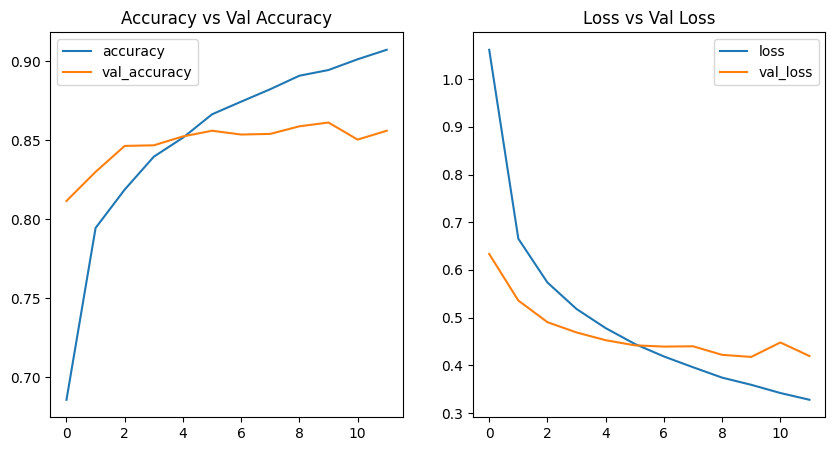

In [67]:
plot_the_graph(history6)

1/1 [==============================] - 0s 25ms/step


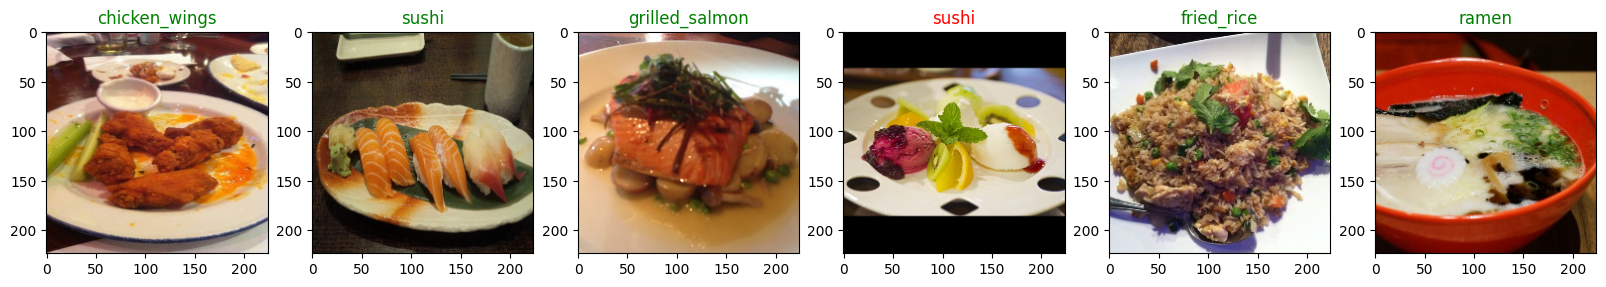

In [72]:
predict_plot(model6)